In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

In [2]:
# read the .out files and get gap values

gauss_outs = []
output_counter = 0
gaps_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

In [3]:
Desired_gaps

'mixed_gen_outlier_all_lowgap.csv'

In [4]:
gaps_dft = []
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    if '### All Done ###\n' in liness:
        if liness[-2][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        lumo_gap = liness[count+1].split()
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.2114 (eV) 
                        gaps_dft.append(27.2113825435*(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:
            print ("gauss did not converged properly", gauss)
    else:
        print ("gauss did not converged properly", gauss)

gauss did not converged properly ONC1dc2ccccc2dNCdCCdCCdCCdC1.out
gauss did not converged properly SdC1CCdCCdCCdCCdCCdCCdC1SS.out
gauss did not converged properly CC1dCdCSCdCCdCqSrN1CS.out
gauss did not converged properly Nn1c2cccccnnc[c]n1-2.out
gauss did not converged properly SSC1dCCdCCdCCdCCdNCdCCdCCdC1.out
gauss did not converged properly OdC1C2dNCdNCdCCdCCdCc3cccc2c31.out
gauss did not converged properly NdNNdCN1CdCSCdCCdCN1S.out
gauss did not converged properly OdCC1dCqc2cc3ocd3c2dOrCdCdCSCdC1.out
gauss did not converged properly CN1CdCCdCCdC[SH]1S[C]COOO.out
gauss did not converged properly COCC1dCCdCCdCdCdCCd[SH]CdCqCdOrCCCCdCCdC1.out
gauss did not converged properly CC1dCCdCCdCCdCC2dCCdCCdC1S2.out
gauss did not converged properly C1dNNdCSC2dCOCdc3sccc3dCC2dC1.out
gauss did not converged properly CCCCC1dNCdCCdNCdCCdCqCrCdC1.out
gauss did not converged properly [NH][S]1CdCCdCc2nccn2CdCCdCC1dN.out
gauss did not converged properly NC1dSqNdSrCdCCdCCdC1SS.out
gauss did not converge

In [5]:
gaps_read_counter

355

In [6]:
len(gaps_dft)

355

In [7]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        output_names[jj] = output_names[jj].replace("q","(")
        output_names[jj] = output_names[jj].replace("r",")")
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

Total output files:  1327
Total successfully read gaps:  355
all done
output names before conversion--------------------->
 ['CC1dCqCrSC2dCNC2dCCdCCdCCdC1', '[C]tC[C]CdCCCCdCCCdC', 'NdCSCCC1dC2CdC2CC1dO', 'CdCCqdCdC1C2dCqCSrC12rCdCC', 'Cc1cc2cc3cccc-3ccccc1-2', 'C1dCCdC2CdCNdCSCSCdC2CdC1', 'C1dCSSS2dCqSCdC2rSSCdCSN1', 'C1dCCdCSC2dCCdCC2dCNdCCdC1', 'NC1SCdCCdC1NdCNCdO', 'C1dCCdCCdC2CdCCdC2CdNCdCCdC1', 'NNNdCdCdCS[C]Cc1c[c]ccc1NCdO', 'CNqCrC1dCCdCc2cscqc2rCdC1N', 'C1dCCdCNdNCdc2ccccc2dCCdC1', 'OdC1CNNC2dCCdCCdC3CdC2CdCCdC3O1', 'OdC1CdCC2dCCdCCdC3CqdC23rO1', '[SH]tSC1dC2CdCCdC2CdCCdCS1', 'OdC1CdCCdCCdC2CdCNdCCdC12', 'CCqCrC1dCNdCCdC[SH]1CqSrNdN', 'C1dCCC2dCCdC3CdCCdC3CdCC2dC1', 'CCNNC1dCCdCSCdCdC1CCdS', 'NdC1CdC2CdNC3dNCdCCdCCdC3NC12N', 'CdC[N]CdCCqdCNdSrCCCCS[CH]N', 'c1cccc2c3ccccc3c-2cc1', 'NC1dCCdCCdCdCCNqCNdOrCdC1', 'CdCCqdCrSC1dCCdCqCr[SH]1S', 'CC12SCdNCdCC1dCCqdOrCqOrS2', 'CC1dCCdc2ccccc2dNCdCC1dS', 'NdC1CqdSrCqNrdC[C]SC2dCCdC12', 'COC1dCCdCC2dCqSCdNC2rSC1dNN', 'ONN1CSCdCdCqCdSrNdN1

In [8]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in output_names:
    dft_smiles_gap['SMILES'] = output_names 
    dft_smiles_gap['DFT_gap'] = gaps_dft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 
merged_output["RE"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["DFT_gap"]*100)
output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE"])), min(merged_output["RE"]), max(merged_output["RE"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 31.160576715267894 and Min: 0.10334840565057737 and Max: 727.9415003215453
Total samples wrote in the output:  355


In [9]:
merged_output['DFT_gap'].iloc[-1] = 8
merged_output['pred_gap'].iloc[-1] = 7.5

/tmp/ipykernel_4020342/234937104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_output['DFT_gap'].iloc[-1] = 8
/tmp/ipykernel_4020342/234937104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_output['pred_gap'].iloc[-1] = 7.5


In [10]:
merged_output

,Unnamed: 0,SMILES,pred_gap,DFT_gap,RE
0,0,O=C1[C]2[C]C(=S)C=C21,1.804824,2.640593,31.650803
1,14,C=Nc1cc2ccc1N=CC=C2SC,1.952187,4.095041,52.328020
2,20,O=CC=CC1=CC(C=O)=CNN=C1,1.829344,2.775561,34.091022
3,34,O=c1ncc2cc3cccccnc-3c-2n1,1.978425,2.373377,16.640935
4,36,NN=CC1=CC=CSC=C1N=CS,1.977231,3.724966,46.919488
...,...,...,...,...,...
350,1340,CCCON=CC1=CC=CC=C[CH]1,2.729174,2.270518,20.200500
351,1342,N=CC1(N=O)N=CC=CC2=C=NC21,2.913447,3.626189,19.655406
352,1343,C=C1C=c2ccccc2=CC=CNC1,2.802422,2.676512,4.704284
353,1347,OC1=CC=CC2(C=CC=CN=CS1)CC=N2,2.732676,3.945923,30.746842


In [11]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["pred_gap"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_gap"], merged_output["pred_gap"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)
print ('r2: ', r2_score(merged_output["DFT_gap"], merged_output["pred_gap"], ))
# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_gap"], merged_output["pred_gap"], )
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_gap"], merged_output["pred_gap"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["pred_gap"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_gap"], merged_output["pred_gap"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["pred_gap"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  355
explained_varice_R2_DFT_des 0.09149006034835316
r2:  -0.38694347207432456
MAE_DFT_des 0.8384698082678731
MAE_DFT_des_manuallycal: 0.838469808267873
FMAE_DFT_des_manuallycal 0.3594890275920603
RMSE_DFT_des 1.0145130676724132
Fractioned_RMSE_DFT_des 0.449175216150025


In [12]:
output.loc [output['DFT_gap']<5].index.shape

(352,)

In [13]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

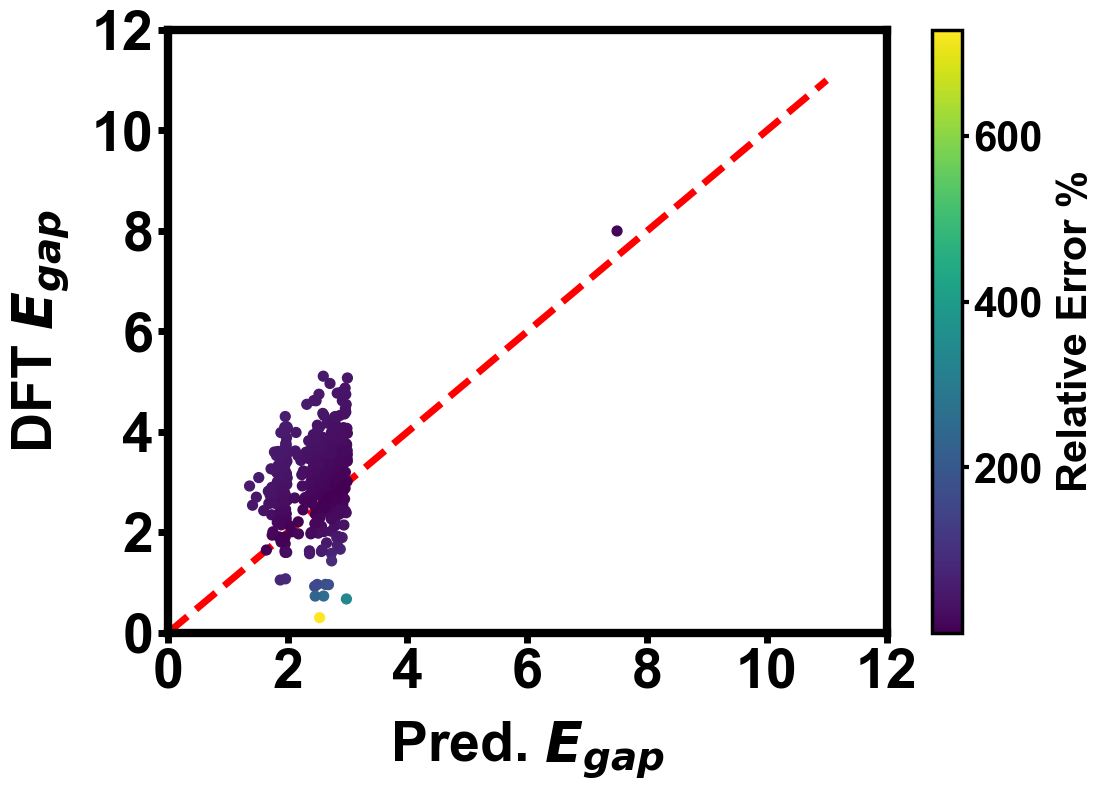

In [16]:
from scipy.optimize import curve_fit
import matplotlib as mpl

gap_range = (0, 11)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_gap = output["pred_gap"]
DFT_gap = output["DFT_gap"]


col = np.abs((DFT_gap-Desired_gap)/DFT_gap*100)
col_orig = np.copy(col)

mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (14*0.8, 10*0.8))
plt.scatter(Desired_gap, DFT_gap, s=50, c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'Pred. $E_{gap}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)
plt.ylabel(r'DFT $E_{gap}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=5, c='red', alpha=1, zorder=0)

plt.xticks ((0, 2, 4, 6, 8, 10, 12,))
plt.yticks ((0, 2, 4, 6, 8, 10, 12,))
cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)


#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)


#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')

In [17]:
output.loc  [output['DFT_gap']<1.5]

,Unnamed: 0,SMILES,pred_gap,DFT_gap,RE
24,166,CCC(C[SH]=S)=[SH]C1=CC=CC1=S,1.877665,1.054713,78.026114
80,528,S=c1cccc2cc-2sc2c(ss1)=CC=2,1.966213,1.077571,82.467156
140,103,CC=C1C=CC=CC=CC(C=S)=C1,2.602096,0.735796,253.643818
177,177,C1=CNC=S2C(=C1)C=CC=Cc1ncccc12,2.495184,0.966276,158.226759
208,451,C=C[N]C=CC(=CN=S)CCCCS[CH]N,2.534561,0.306128,727.941500
232,506,OC1=[SH]CC2=NC=CC=CC2=NCC=C1,2.452216,0.928452,164.118707
239,522,CC1=CC=C2C=CC=C1C=CC=CC=CS2,2.631492,0.966820,172.180060
262,833,C=c1c2cccsc-2c2c1=CC=C2,2.682599,0.961378,179.036820
298,1204,CC1=CC=C2N=CSC=CC=CC=C[SH]2S1,2.982071,0.677291,340.293763
320,1256,S=CC1=CC=CC=Cc2cccc1c2,2.460970,0.734435,235.083293
